In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def slice_time(CE_all):
    
    ''' This function return a list of array that contains the CE in each un-averaged run'''
    
    t_all = CE_all[:,0]
    CE_list = []
    
    i0 = 0
    i1 = 0
    
    for i in range(len(t_all)-1):
        if t_all[i+1] < t_all[i]:
            i1 = i+1
            CE_list.append(CE_all[i0:i1,:])
            i0 = i1
            
    return CE_list


    

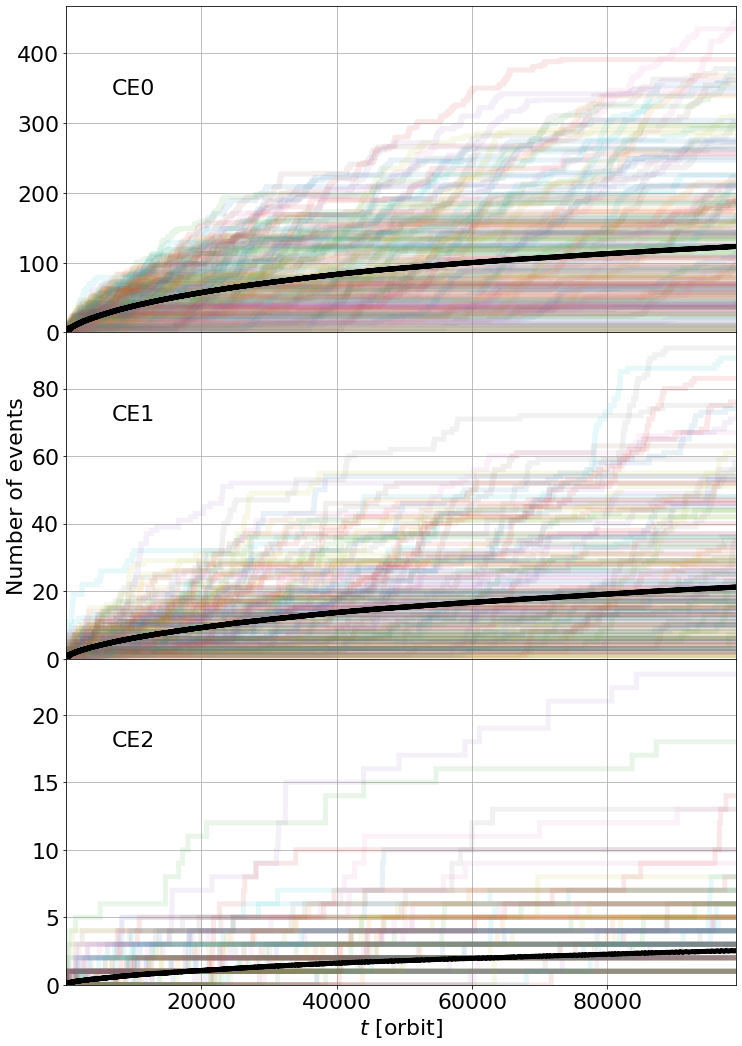

In [5]:
## 
##  Read the data for canonical runs
##

RH = (2e-5/3.)**(1./3.)

can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0.npy')
can_CE0_list = slice_time(can_CE0)

can_CE1 = np.load('d:/_work/BBH-data_use/_data/can_CE1.npy')
can_CE1_list = slice_time(can_CE1)

can_CE2 = np.load('d:/_work/BBH-data_use/_data/can_CE2.npy')
can_CE2_list = slice_time(can_CE2)

can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0-2000.npy')
can_CE1 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-1), : ]
can_CE2 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-2), : ]

##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(3,1, sharex=True, figsize=(12,18))
fig.subplots_adjust(hspace=0.0)

axs[2].set_xlabel(r'$t$ [orbit]')
axs[1].set_ylabel(r'Number of events')
axs[2].set_xlim([1e0,0.99e5])

# parameters of the plot

nbins = 4001
t_bins = np.linspace(1e1,1e5,nbins)
nw = 1./2000.
lw = 5
aluse = 0.1


# CE0

for i in range(len(can_CE0_list)):
    axs[0].hist(can_CE0_list[i][:,0], bins=t_bins,linewidth=lw,density=False,cumulative=True,
                histtype='step',label=r'CE0',alpha=aluse)

Nt_CE0, bin_out, bar_out = axs[0].hist(can_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=0$',color='k')

axs[0].grid()
axs[0].set_axisbelow(True)


# CE1

for i in range(len(can_CE1_list)):
    axs[1].hist(can_CE1_list[i][:,0], bins=t_bins,linewidth=lw,density=False,cumulative=True,
                histtype='step',label=r'CE0',alpha=aluse)

Nt_CE1, bin_out, bar_out = axs[1].hist(can_CE1[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE1[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=0$',color='k')

axs[1].grid()
axs[1].set_axisbelow(True)


# CE0

for i in range(len(can_CE2_list)):
    axs[2].hist(can_CE2_list[i][:,0], bins=t_bins,linewidth=lw,density=False,cumulative=True,
                histtype='step',label=r'CE0',alpha=aluse)

Nt_CE2, bin_out, bar_out = axs[2].hist(can_CE2[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE2[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=0$',color='k')

axs[2].grid()
axs[2].set_axisbelow(True)


##
##  Set the labels
##

axs[0].text(0.1, 0.75,'CE0', ha='center', va='center', transform=axs[0].transAxes)
axs[1].text(0.1, 0.75,'CE1', ha='center', va='center', transform=axs[1].transAxes)
axs[2].text(0.1, 0.75,'CE2', ha='center', va='center', transform=axs[2].transAxes)


##  Save the figure

plt.savefig('./pics/pics-NCE-vs-t.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-NCE-vs-t.png',bbox_inches='tight',transparent=True)


123.78849999990786
[5.29312722 0.49183642]
21.298999999995065
[288.22297244   0.52540409]
2.541500000000042
[1.73476501e+04 5.37925043e-01]


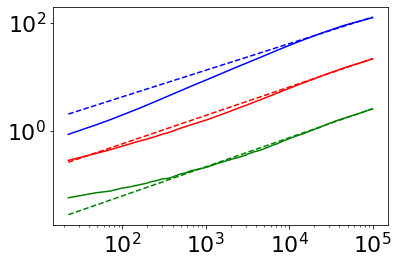

In [16]:
from scipy.optimize import curve_fit

def Nt(t, T0, beta):
    return (t/T0)**beta

t_mid = 0.5*(t_bins[1:]+t_bins[:-1])

popt, pcov = curve_fit(Nt, t_mid, Nt_CE0, p0=np.array([Nt_CE0[-1]/t_mid[-1],0.55]))
print(Nt_CE0[-1])
print(popt)
plt.loglog(t_mid,Nt_CE0,'b')
plt.loglog(t_mid,Nt(t_mid,popt[0],popt[1]),'b--')

popt, pcov = curve_fit(Nt, t_mid, Nt_CE1, p0=np.array([Nt_CE1[-1]/t_mid[-1],0.55]))
print(Nt_CE1[-1])
print(popt)
plt.loglog(t_mid,Nt_CE1,'r')
plt.loglog(t_mid,Nt(t_mid,popt[0],popt[1]),'r--')

popt, pcov = curve_fit(Nt, t_mid, Nt_CE2, p0=np.array([Nt_CE2[-1]/t_mid[-1],0.55]))
print(Nt_CE2[-1])
print(popt)
plt.loglog(t_mid,Nt_CE2,'g')
plt.loglog(t_mid,Nt(t_mid,popt[0],popt[1]),'g--')

In [15]:
print(len(can_CE0[:,0])*nw)
print(len(can_CE1[:,0])*nw)
print(len(can_CE2[:,0])*nw)

Ni0 = np.zeros(len(can_CE0_list))
for i in range(len(can_CE0_list)):
    Ni = len(can_CE0_list[i][:,0])
    Ni0[i] = Ni
print(np.std(Ni0))

Ni1 = np.zeros(len(can_CE1_list))
for i in range(len(can_CE1_list)):
    Ni = len(can_CE1_list[i][:,0])
    Ni1[i] = Ni
print(np.std(Ni1))

Ni2 = np.zeros(len(can_CE2_list))
for i in range(len(can_CE2_list)):
    Ni = len(can_CE2_list[i][:,0])
    Ni2[i] = Ni
print(np.std(Ni2))

124.395
21.5765
2.619
100.23174152956862
19.480827639056958
3.4240397738193726


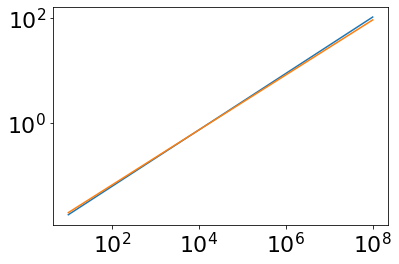

In [19]:
t_mid = np.logspace(1,8,10)
plt.loglog(t_mid,(t_mid/1.73476501e+04)**5.37925043e-01)
plt.loglog(t_mid,(t_mid/1.76469312e+04)**5.24342911e-01)